In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshape to fit CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,validation_data=(x_test, y_test))

Epoch 1/10


938/938 [==============================] - 21s 20ms/step - loss: 0.5913 - accuracy: 0.7872 - val_loss: 0.3964 - val_accuracy: 0.8575
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3905 - accuracy: 0.8593 - val_loss: 0.3320 - val_accuracy: 0.8798
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3384 - accuracy: 0.8780 - val_loss: 0.3037 - val_accuracy: 0.8907
Epoch 4/10
584/938 [=================>............] - ETA: 5s - loss: 0.3093 - accuracy: 0.8876

KeyboardInterrupt: 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9131
Test Accuracy: 0.9131


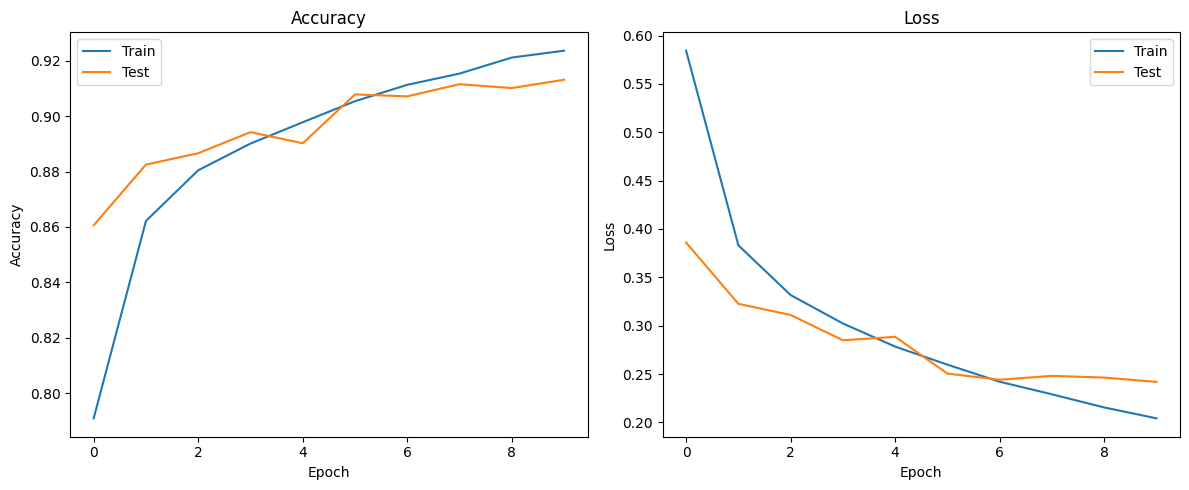

In [10]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step


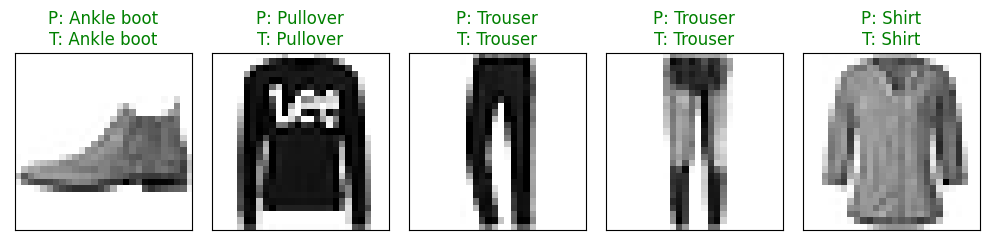

In [11]:
# Class names for Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict on test set
predictions = model.predict(x_test)

# Display first 5 test images with predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"P: {class_names[pred_label]}\nT: {class_names[true_label]}", color=color)

plt.tight_layout()
plt.show()
